<a href="https://colab.research.google.com/github/jimsjoo/gilbut_portfolio/blob/master/4%EC%9E%A5_%EC%9E%90%EB%B3%B8%EC%9E%90%EC%82%B0%EA%B0%80%EA%B2%A9%EA%B2%B0%EC%A0%95_%EB%AA%A8%EB%8D%B8(CAPM)(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

간단한 최적화 예#1

In [1]:
from scipy.optimize import minimize
import numpy as np

In [3]:
def objective1(x):
    return x + 1

def constraint(x):
    return x - 3

x0= [ -1 ]
b = ( -1, 6 )
bnd = ( b, )
con = {'type':'ineq','fun':constraint}

sol= minimize(objective1, x0, method='SLSQP', bounds=bnd, constraints=con)

In [4]:
print(sol.x)

[3.]


간단한 최적화 예#2

In [6]:
def objective2(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    return x1*x4*(x1+x2+x3)+x3

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25

def constraint2(x):
    sum_sq = np.sum(np.square(x))
    return sum_sq-40

x0 = [ 1, 5, 5, 1 ]
b  = ( 1, 5 )
bnds = ( b, b, b, b )
con1 = { 'type':'ineq','fun':constraint1 }
con2 = { 'type':'eq','fun':constraint2 }
cons = [ con1, con2 ]

sol = minimize(objective2, x0, method='SLSQP',bounds=bnds,constraints=cons)

In [7]:
print(sol)

     fun: 17.01401724556073
     jac: array([14.57227039,  1.37940764,  2.37940764,  9.56415081])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.74299607, 3.82115466, 1.37940764])


3장 평균-분산 포트폴리오 이론에서 이어지는 내용

In [8]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib as mpl 

tickers = ['AAPL', 'F', 'AMZN', 'GE', 'TSLA']
pxclose = pd.DataFrame()

for t in tickers:
    pxclose[t] = web.DataReader(t, data_source='yahoo',start='01-01-2019', end='31-12-2019')['Adj Close']

In [9]:
ret_daily = pxclose.pct_change()
ret_annual = ret_daily.mean() * 250
cov_daily = ret_daily.cov()
cov_annual = cov_daily * 250

In [10]:
ret_daily.head()

,AAPL,F,AMZN,GE,TSLA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.01519,-0.025242,0.001242,-0.031472
2019-01-04,0.042689,0.03856,0.050064,0.021092,0.057697
2019-01-07,-0.002226,0.02599,0.034353,0.061968,0.054361
2019-01-08,0.019063,0.00965,0.016612,-0.020595,0.001164


In [11]:
print(cov_annual.head())

          AAPL         F      AMZN        GE      TSLA
AAPL  0.068048  0.021624  0.035169  0.032125  0.042293
F     0.021624  0.074516  0.022533  0.039544  0.016574
AMZN  0.035169  0.022533  0.051708  0.030574  0.032658
GE    0.032125  0.039544  0.030574  0.161524  0.047065
TSLA  0.042293  0.016574  0.032658  0.047065  0.237425


In [12]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, ret_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

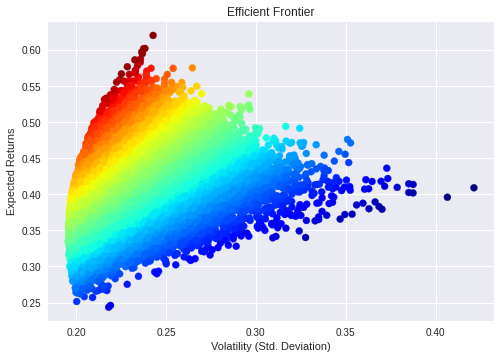

In [13]:
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

최소분산 포트폴리오(MVP, Minimum Volatility Portfolio)

In [14]:
from scipy.optimize import minimize

def obj_variance(weights, cov):
    return np.sqrt(weights.T @ covmat @ weights)

In [15]:
covmat=cov_daily*250
weights =np.array([0.2, 0.2, 0.2, 0.2, 0.2])
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1))
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) 
res = minimize(obj_variance, weights,(covmat), method='SLSQP', bounds=bnds, constraints=cons)

In [16]:
print(res)

     fun: 0.19535983060370768
     jac: array([0.19517164, 0.19553577, 0.19532278, 0.19527321, 0.19548151])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.20785615, 0.29963679, 0.42386232, 0.02998727, 0.03865747])


In [17]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, ret_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

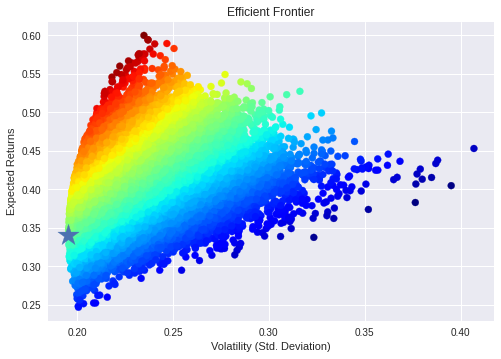

In [18]:
rets = np.sum(ret_daily.mean() * res['x']) * 250
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

Sharpe ratio 최적화

In [19]:
from scipy.optimize import minimize

def obj_sharpe(weights, returns, covmat, rf):
    ret = np.dot(weights, returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(covmat, weights)))
    return 1/((ret-rf)/np.sqrt(vol))

In [20]:
n_assets = len(tickers)
covmat=cov_daily*250
rf = 0.01
weights = np.ones([n_assets])/n_assets
bnds = tuple((0., 1.) for i in range(n_assets))
cons = ({'type': 'eq', 'fun': lambda w:  np.sum(w) - 1}) 
res = minimize(obj_sharpe, weights,(ret_annual, covmat, rf), method='SLSQP', bounds=bnds, constraints=cons)

In [21]:
print(res)

     fun: 0.7766010981552891
     jac: array([-0.40010898, -0.20859025, -0.04480552, -0.34614637, -0.2510052 ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.00000000e+00, 1.30104261e-16, 0.00000000e+00, 4.85722573e-17,
       1.04083409e-17])


In [22]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, ret_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

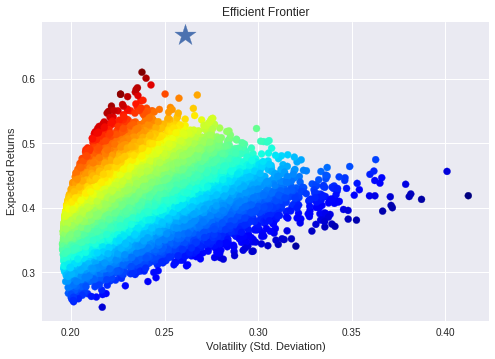

In [23]:
rets = np.sum(ret_daily.mean() * res['x']) * 250
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()